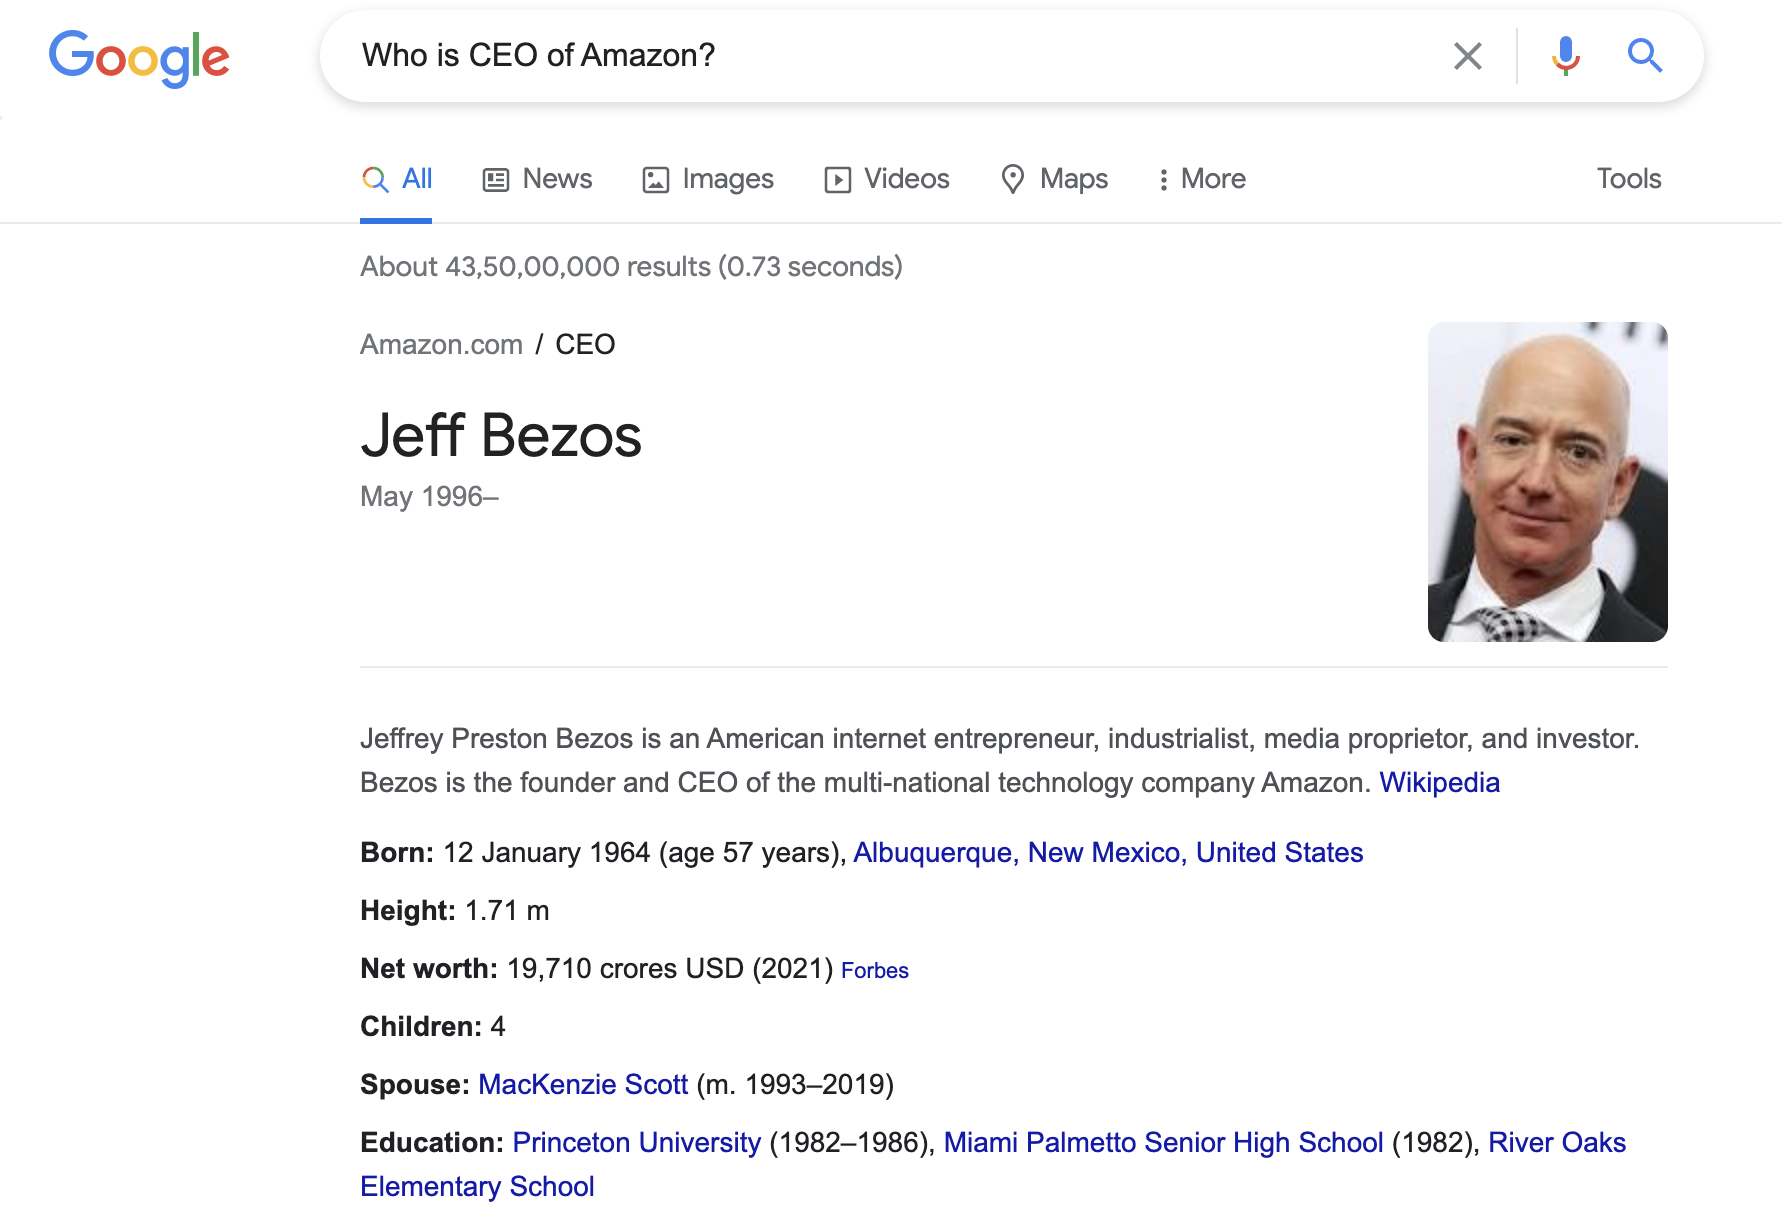

In [ ]:
import spacy # import spacy module

In [ ]:
model = spacy.load("en_core_web_sm") #load pre-trained model

doc = "Sumit is an adjunct faculty at Upgrad. "

processed_doc = model(doc); #process input and perform NLP tasks


Since a named entity is a noun, let us see what information we get from using POS tags.

In [ ]:
for token in processed_doc:
  print(token.text, " -- ", token.pos_)

Sumit  --  PROPN
is  --  AUX
an  --  DET
adjunct  --  ADJ
faculty  --  NOUN
at  --  ADP
Upgrad  --  PROPN
.  --  PUNCT


So we see that the POS tags for named entities are correctly identified. Let us see what the output of NER system in spacy is to understand the differences.

In [ ]:
for ent in processed_doc.ents:
  print(ent.text, " -- ", ent.start_char, " -- ", ent.end_char, " -- ", ent.label_)

Upgrad  --  31  --  37  --  GPE


Okay, so we did find some named entities, but clearly we missed the faculty name.

Let us build upon that example.

In [ ]:
doc2 = "Dr. Sumit is an adjunct faculty at UpGrad"
processed_doc2 = model(doc2)

In [ ]:
for token in processed_doc2:
  print(token.text, " -- ", token.pos_)


Dr.  --  PROPN
Sumit  --  PROPN
is  --  AUX
an  --  DET
adjunct  --  ADJ
faculty  --  NOUN
at  --  ADP
UpGrad  --  PROPN


In [ ]:
for ent in processed_doc2.ents:
  print(ent.text, " -- ", ent.start_char, " -- ", ent.end_char, " -- ", ent.label_)

Sumit  --  4  --  9  --  PERSON
UpGrad  --  35  --  41  --  ORG


Now the NER system was able to correctly identify the faculty name from the input sentence.

In [ ]:
doc3 = "Statue of Liberty is situated in New York, USA."
processed_doc3 = model(doc3)

In [ ]:
for token in processed_doc3:
  print(token.text, " -- ", token.pos_)


Statue  --  PROPN
of  --  ADP
Liberty  --  PROPN
is  --  AUX
situated  --  VERB
in  --  ADP
New  --  PROPN
York  --  PROPN
,  --  PUNCT
USA  --  PROPN
.  --  PUNCT


Note in this example, that using a sequence of POS tags is not always sufficient. There are numerous variations in real life that are not always possible to anticipate beforehand and train your models or create rules accordingly.

In [ ]:
for ent in processed_doc3.ents:
  print(ent.text, " -- ", ent.start_char, " -- ", ent.end_char, " -- ", ent.label_)

Liberty  --  10  --  17  --  GPE
New York  --  33  --  41  --  GPE
USA  --  43  --  46  --  GPE


Finally, let us see the output of NER at token level illustrating the IOB format discussed in lectures.

In [ ]:
for token in processed_doc3:
  print(token.text, " -- ", token.ent_iob_, " -- ", token.ent_type_)

Statue  --  O  --  
of  --  O  --  
Liberty  --  B  --  GPE
is  --  O  --  
situated  --  O  --  
in  --  O  --  
New  --  B  --  GPE
York  --  I  --  GPE
,  --  O  --  
USA  --  B  --  GPE
.  --  O  --  


- You can use spacy's NER model to identify named entities in input text. 
- You also studied some cases where the model is not able to correctly identify all the entities invovled.
- There are various situations where systems make errors and depending on the appliation and the severity and types of errors, follow up corrective measures can be employed (manual validation, discarding erroneous outouts, using heuristics, etc.)


Let us now consider one practical application of NER systems -- 
**Anonymization of data and redacting personally indentifying information**. 

- In many scenarios, we want to withheld sensitive information such as names of persons in various confidential information. 
- We can use NER methods to automatically identify PERSONS in text and remove PERSON names from text.

Let us see how it can be done with what we have learnt till now. We take an example email from Enron e-mail dataset for ilustration in this demo.

- E-mail source:
http://www.enron-mail.com/email/lay-k/elizabeth/Christmas_in_Aspen_4.html

- Complete Enron data:
http://www.enron-mail.com/

In [ ]:
email = ('Dear Family, Jose Luis and I have changed our dates, we are '
         'going to come to Aspen on the 23rd of December and leave on the '
         '30th of December. We would like to stay in the front bedroom of '
         'the Aspen Cottage so that Mark, Natalie and Zachary can stay in '
         'the guest cottage. Please let me know if there are any problems '
         'with this. If I do not hear anything, I will assume this is all '
         'o.k. with you.'
         'Love, Liz')

In [ ]:
processed_email = model(email) # Apply spacy's model to process the email

In [ ]:

anonymized_email = list(email) # intialize data structure to store anonymized email

for ent in processed_email.ents:
  if(ent.label_ == 'PERSON'): # if the word corresponds to a PERSON entity
    for char_pos in range(ent.start_char, ent.end_char): # use character positions
      anonymized_email[char_pos] = '*'


print("\n\n-- After Anonymization--\n")
"".join(anonymized_email)




-- After Anonymization--



'***********, ********* and I have changed our dates, we are going to come to ***** on the 23rd of December and leave on the 30th of December. We would like to stay in the front bedroom of the Aspen Cottage so that ****, ******* and ******* can stay in the guest cottage. Please let me know if there are any problems with this. If I do not hear anything, I will assume this is all o.k. with you.Love, ***'